We used the OpenCV module to apply Otsu's Thresholding method on the images. The following command allowed us to install OpenCV:
* conda install --channel https://conda.anaconda.org/menpo opencv3



These cells apply Otsu's Thresholding method to binariaze the images, which are saved in a new folder called `peabody_files_otsu`. (folder is on Google Drive).
Afterwards, we use the Scikit-Image library to crop the images.

In [2]:
import numpy as np
from PIL import Image
import cv2
import os
from skimage import io
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import re
%matplotlib inline

In [2]:
def otsu_threshold(im_path):
    im = Image.open(im_path)
    im = cv2.cvtColor(np.array(im),cv2.COLOR_RGB2GRAY)
    im = im[10:im.shape[0]-10,10:im.shape[1]-10]
    height,width = im.shape
    t, d = cv2.threshold(im,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return d

In [3]:
acc_nums = ['1','2','3','4','5','6','7','16','17','18','20','21','22','23','24','25']

The following two cells create the new folder containing the binarized images.

In [4]:
save_folder = ("peabody_files_otsu")
os.mkdir(save_folder)
os.mkdir("peabody_files_otsu/Accession_Files")

FileExistsError: [Errno 17] File exists: 'peabody_files_otsu'

In [20]:
rootdir = 'peabody_files/Accession_Files'

for acc_no in acc_nums:
    ## Creates new folder to save files in
    new_folder_path = "peabody_files_otsu/Accession_Files/Acc._No._" + str(acc_no)
    os.mkdir(new_folder_path)
    
    ## Finding image
    path = rootdir + "/Acc._No._" + str(acc_no)
    for file,subdir,filelist in os.walk(path):
        for image_name in filelist:
            image_path = path + "/" + image_name
            image_save_name = image_name + ".png"
            save_path = new_folder_path + "/" + image_save_name
            cv2.imwrite(save_path,otsu_threshold(image_path))

Otsu's thresholding reduces a grayscale image to a binary image (black and white). This process assumes that sections of the image are part of the foreground and that sections are part of the background, and finds the best threshold value such that the sum of the pixel values on each side of the threshold value is equal to zero. 

In the next cells we use skimage to crop the binarized images, and save these pieces into a dictionary.

In [5]:
def crop_image(sk_im):
    'Takes a skimage image file and crops the image, returns a dictionary of the pieces.'
    pieces = {}
    left_box = sk_im[5:600,5:420]
    length,height = left_box.shape[1],int(left_box.shape[0]/4)
    left_box_pieces = [left_box[i*height-height:i*height,0:length] for i in range(1,5)]
    
    right_box = sk_im[5:600,470:1770]
    length,height = right_box.shape[1], int(right_box.shape[0]/4)
    right_box_pieces = [right_box[i*height-height:i*height,0:length] for i in range(1,5)]
    
    bottom_box = sk_im[620:1100,10:1775]
    length,height = bottom_box.shape[1],int(bottom_box.shape[0]/4)
    bottom_box_pieces = [bottom_box[i*height-height:i*height,0:length] for i in range(1,4)]
    
    names = ['cat_no','acc_no','orig_no','photo_no']
    pieces.update(dict(zip(names,left_box_pieces)))
    
    names = ['name','site','site_no','locality']
    pieces.update(dict(zip(names,right_box_pieces)))
    
    names = ['situation','remarks','figured']
    pieces.update(dict(zip(names,bottom_box_pieces)))
    
    return pieces

In [7]:
rootdir = 'peabody_files_otsu/Accession_Files'
filed_dict = {} ## each key contains an array of the dictionaries of cropped images
total_array = [] ## contains all dictionaries of cropped images, not filed
for acc_no in acc_nums:
    path = rootdir + "/Acc._No._" + str(acc_no)
    folder = []
    for file,subdir,filelist in os.walk(path):
        for image_name in filelist:
            image_path = path + "/" + image_name
            image = io.imread(image_path)
            ### if you want `folder` to be a dictionary with keys of image names eg. key = 1_0016
            
            # folder = {} 
            # folder[re.sub("[\w.]","",image_name)] = crop_image(image)
            
            ### otherwise folder is an array
            
            folder.append(crop_image(image)) 
            
    total_array.append(folder)
    filed_dict[acc_no] = folder

The above cell goes through all of the binarized images in each accession-number folder. In each accession-number folder, all of the images are cropped by the labels on the images. The pieces of these images can be accessed through a dictionary, where the keys are the labels on the image. There is one dictionary per image. Then, the dictionaries for each image under an accession number are added into an array. This array can be accessed through the dictionary called `filed_dict`.

If we want to see the piece containing `name` in the first image in the Accession No. 1 folder, for example, we can use the following code.

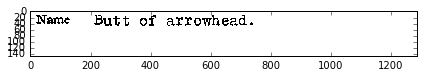

In [10]:
io.imshow(filed_dict['1'][0]['name'],cmap='gray',vmin=0,vmax=225)
plt.show()